## BSAN6080 <br> Hotel EDA
#### Tina Brauneck<br>Spring 2025

Description: (project description TBD) <br>
data source: https://www.kaggle.com/datasets/mojtaba142/hotel-booking/data?select=hotel_booking.csv <br>
More about the data: https://www.sciencedirect.com/science/article/pii/S2352340918315191
<br><br>
This dataset includes demand data for two hotels. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both hotels are located in Portugal.

<br>

#### Table of Contents
##### &emsp; Step 1: Generating an Analytics Base Table (ABT)

##### &emsp; Step 2: Assessing Data Quality

&emsp; &emsp; &emsp; Data Quality Report: Continuous Features <br>
&emsp; &emsp; &emsp; Data Quality Report: Categorical Features <br>
&emsp; &emsp; &emsp; Cardinality Checks <br>

##### &emsp; Step 3: Data Exploration

&emsp; &emsp; &emsp; Data Distribution <br>
&emsp; &emsp; &emsp; &emsp; Histograms <br>
&emsp; &emsp; &emsp; &emsp; Bar Charts <br>
&emsp; &emsp; &emsp; Feature/Target Relationships <br>
&emsp; &emsp; &emsp; &emsp; Scatterplot Matrix <br>
&emsp; &emsp; &emsp; &emsp; Correlation Matrix <br>

##### &emsp; Step 4: Data Preparation

&emsp; &emsp; &emsp; &emsp; Imputations and Calculations <br>
&emsp; &emsp; &emsp; &emsp; Dropping Features<br>
&emsp; &emsp; &emsp; &emsp; Encoding<br>
&emsp; &emsp; &emsp; &emsp; Outlier Plan <br>
&emsp; &emsp; &emsp; &emsp; Dropping Rows <br>
&emsp; &emsp; &emsp; &emsp; Transformations<br>

 <br><br>

### Step 1: Generating an Analytics Base Table (ABT)

In [303]:
# This step puts our data into a dataframe and provides a first look at the data.

In [304]:
# Optional working directory set up. Change the path and uncomment lines below to change the working directory.
#import os
#os.chdir(r"C:\Users\ttesn\OneDrive\Documents\MSBA\BSAN 6080\")
#print(os.getcwd()) 

In [305]:
# Optional install. Uncomment and install if not already installed
# pip install plotnine pandas
# pip install plotly

In [306]:
#Package imports
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotnine import ggplot, aes, geom_histogram, facet_wrap, geom_bar
from plotnine.data import mpg

In [307]:
df = pd.read_csv(r"hotel_booking_with_IDs.csv") # read in the data

In [308]:
## print the DataFrame's shape, i.e., number of rows and columns
print(df.shape)

(119390, 37)


In [309]:
df.head() #preview the data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,Customer ID
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,C000001
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,C000002
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,C000003
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,C000004
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498,C000005


In [310]:
df.tail() #preview the data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,Customer ID
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,C119386
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,C119387
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,C119388
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,C119389
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,9/7/2017,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482,C119390


### Step 2: Assessing Data Quality

In [312]:
# This function determines if the feature is categorial or numerical

In [313]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [314]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [315]:
pd.set_option('display.width', 1000)

In [316]:
# This function generates a Data Quality Report

def data_quality_report(df, report_type):
    continuous_rows = []
    categorical_rows = []
    
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]): 
            count = df[col].count()
            missing_percentage = df[col].isnull().mean() * 100
            cardinality = df[col].nunique()
            first_quartile = df[col].quantile(0.25)
            mean = df[col].mean()
            median = df[col].median()
            third_quartile = df[col].quantile(0.75)
            max_value = df[col].max()
            std_dev = df[col].std()
            
            continuous_rows.append({
                'Feature': col,
                'Count': count,
                '% Missing': missing_percentage,
                'Card.': cardinality,
                '1st Qrt.': first_quartile,
                'Mean': mean,
                'Median': median,
                '3rd Qrt.': third_quartile,
                'Max': max_value,
                'Std. Dev.': std_dev
            })

        else:
            count = df[col].count()
            missing_percentage = df[col].isnull().mean() * 100
            cardinality = df[col].nunique()
            value_counts = df[col].value_counts()
            mode = value_counts.index[0] if not value_counts.empty else 'NA'
            mode_freq = value_counts.iloc[0] if not value_counts.empty else 0
            mode_percentage = (mode_freq / count) * 100 if count > 0 else 0
            second_mode = value_counts.index[1] if len(value_counts) > 1 else 'NA'
            second_mode_freq = value_counts.iloc[1] if len(value_counts) > 1 else 0
            second_mode_percentage = (second_mode_freq / count) * 100 if count > 0 else 0

            categorical_rows.append({
                'Feature': col,
                'Count': count,
                '% Missing': missing_percentage,
                'Card.': cardinality,
                'Mode': mode,
                'Mode Freq.': mode_freq,
                'Mode %': mode_percentage,
                '2nd Mode': second_mode,
                '2nd Mode Freq.': second_mode_freq,
                '2nd Mode %': second_mode_percentage
            })

    continuous_report = pd.DataFrame(continuous_rows)
    categorical_report = pd.DataFrame(categorical_rows)

    if report_type == "cont":
        return continuous_report

    elif report_type == "cat":
        return categorical_report
        
    else:
        raise ValueError("Error: report type options are 'cat' or 'cont'")

In [317]:
dqr_cont = data_quality_report(df,"cont")

In [318]:
dqr_cat = data_quality_report(df,"cat")

#### 2A. Data Quality Report: Continuous Features

In [320]:
dqr_cont

,Feature,Count,% Missing,Card.,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.
0,is_canceled,119390,0.000000,2,0.00,0.370416,0.000,1.0,1.0,0.482918
1,lead_time,119390,0.000000,479,18.00,104.011416,69.000,160.0,737.0,106.863097
2,arrival_date_year,119390,0.000000,3,2016.00,2016.156554,2016.000,2017.0,2017.0,0.707476
3,arrival_date_week_number,119390,0.000000,53,16.00,27.165173,28.000,38.0,53.0,13.605138
4,arrival_date_day_of_month,119390,0.000000,31,8.00,15.798241,16.000,23.0,31.0,8.780829
5,stays_in_weekend_nights,119390,0.000000,17,0.00,0.927599,1.000,2.0,19.0,0.998613
6,stays_in_week_nights,119390,0.000000,35,1.00,2.500302,2.000,3.0,50.0,1.908286
7,adults,119390,0.000000,14,2.00,1.856403,2.000,2.0,55.0,0.579261
8,children,119386,0.003350,5,0.00,0.103890,0.000,0.0,10.0,0.398561
9,babies,119390,0.000000,5,0.00,0.007949,0.000,0.0,10.0,0.097436


#### 2B. Data Quality Report: Categorical Features

In [322]:
dqr_cat

,Feature,Count,% Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,hotel,119390,0.000000,2,City Hotel,79330,66.446101,Resort Hotel,40060,33.553899
1,arrival_date_month,119390,0.000000,12,August,13877,11.623252,July,12661,10.604741
2,meal,119390,0.000000,5,BB,92310,77.318033,HB,14463,12.114080
3,country,118902,0.408744,177,PRT,48590,40.865587,GBR,12129,10.200838
4,market_segment,119390,0.000000,8,Online TA,56477,47.304632,Offline TA/TO,24219,20.285619
5,distribution_channel,119390,0.000000,5,TA/TO,97870,81.975040,Direct,14645,12.266521
6,reserved_room_type,119390,0.000000,10,A,85994,72.027808,D,19201,16.082586
7,assigned_room_type,119390,0.000000,12,A,74053,62.026133,D,25322,21.209482
8,deposit_type,119390,0.000000,3,No Deposit,104641,87.646369,Non Refund,14587,12.217941
9,customer_type,119390,0.000000,4,Transient,89613,75.059050,Transient-Party,25124,21.043638


In [323]:
# We may need to drop the rows missing country

In [324]:
df.loc[df['children'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,Customer ID
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,8/1/2015,Craig Campos,CraigCampos@mail.com,820-622-9854,************7219,C040601
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,8/4/2015,David Murphy,David.Murphy94@yahoo.com,231-438-6733,************8925,C040668
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,8/4/2015,Frank Burton,Frank.Burton@comcast.net,395-084-3601,************6190,C040680
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,8/9/2015,Jerry Roberts,JRoberts@hotmail.com,979-355-3554,************5648,C041161


In [325]:
# Drop rows with missing values for children

#### 2C. Dropping Low-Quality Features

In [327]:
dqr_cat[dqr_cat['% Missing'] > 60]

,Feature,Count,% Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %


In [328]:
dqr_cont[dqr_cont['% Missing'] > 60]

,Feature,Count,% Missing,Card.,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.
15,company,6797,94.306893,352,62.0,189.266735,179.0,270.0,543.0,131.655015


In [329]:
# We may need to drop company and agent.

In [353]:
# Drop row or columns for missing data issues
abt = df.copy() #first let's make a copy of the dataframe
abt.dropna(subset =['country'], inplace = True) # drop rows

#### 2D. Cardinality Checks

If a feature has cardinality of 1, we drop it, because it is no use; all the values are the same.

In [46]:
dqr_cat[dqr_cat['Card.'] == 1]

,Feature,Count,% Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %


In [47]:
dqr_cont[dqr_cont['Card.'] == 1]

,Feature,Count,% Missing,Card.,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.


In [48]:
# No features have a cardinality of 1.

In [49]:
# Checking for categorical features that have too high a cardinality. These may just be unique identifiers and can be dropped.
dqr_cat[dqr_cat['Card.'] > 1000]

,Feature,Count,% Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
12,name,119390,0.0,81503,Michael Johnson,48,0.040204,Robert Smith,48,0.040204
13,email,119390,0.0,115889,Michael.C@gmail.com,6,0.005026,Andrew_S@yandex.com,5,0.004188
14,phone-number,119390,0.0,119390,669-792-1661,1,0.000838,951-326-6252,1,0.000838
15,credit_card,119390,0.0,9000,************4923,28,0.023453,************3627,28,0.023453
16,Customer ID,119390,0.0,118881,C029160,3,0.002513,C002083,3,0.002513


In [50]:
# These are all identifiers and can be dropped. 
# However, before dropping them, we need to perform a fuzzy match and add a single, unique identifier so we can aggregate by customer.

In [51]:
# Checking for continuous features that have too low a cardinality. These may actually be encoded categorical features.
dqr_cont[dqr_cont['Card.'] < 30]

,Feature,Count,% Missing,Card.,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.
0,is_canceled,119390,0.00000,2,0.0,0.370416,0.0,1.0,1.0,0.482918
2,arrival_date_year,119390,0.00000,3,2016.0,2016.156554,2016.0,2017.0,2017.0,0.707476
5,stays_in_weekend_nights,119390,0.00000,17,0.0,0.927599,1.0,2.0,19.0,0.998613
7,adults,119390,0.00000,14,2.0,1.856403,2.0,2.0,55.0,0.579261
8,children,119386,0.00335,5,0.0,0.103890,0.0,0.0,10.0,0.398561
9,babies,119390,0.00000,5,0.0,0.007949,0.0,0.0,10.0,0.097436
10,is_repeated_guest,119390,0.00000,2,0.0,0.031912,0.0,0.0,1.0,0.175767
11,previous_cancellations,119390,0.00000,15,0.0,0.087118,0.0,0.0,26.0,0.844336
13,booking_changes,119390,0.00000,21,0.0,0.221124,0.0,0.0,21.0,0.652306
18,required_car_parking_spaces,119390,0.00000,5,0.0,0.062518,0.0,0.0,8.0,0.245291


In [355]:
# is_canceled and is repeated_guest can be graphed with our categorical data, since these are actually encoded binary categorical columns.
cont_convert = ['is_canceled', 'is_repeated_guest']

### Duplicate Customer Handling

In [358]:
len(abt[abt.duplicated("name", keep = False)])

56229

In [360]:
len(abt[abt.duplicated("email", keep = False)])

6458

In [362]:
repeats = abt[abt.duplicated('Customer ID', keep = False)]

In [364]:
print(repeats.shape)

(1002, 37)


In [366]:
repeats.sort_values('Customer ID')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,Customer ID
289,Resort Hotel,0,33,2015,July,28,11,2,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.00,0,0,Check-Out,7/15/2015,Michael Johnson,Michael.Johnson@outlook.com,122-626-4644,************7241,C000290
67582,City Hotel,1,161,2017,May,18,5,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,30.0,NaN,0,Transient,120.00,0,0,Canceled,11/25/2016,Michael Johnson,Michael.Johnson@outlook.com,651-160-0302,************9103,C000290
443,Resort Hotel,0,66,2015,July,29,16,0,2,2,0.0,0,BB,DNK,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,103.50,0,1,Check-Out,7/18/2015,David Lewis,Lewis_David67@aol.com,972-030-2721,************6860,C000444
17380,Resort Hotel,0,67,2015,October,41,4,2,3,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,52.40,0,1,Check-Out,10/9/2015,David Lewis,David_Lewis42@verizon.com,273-354-1329,************6860,C000444
91388,City Hotel,0,0,2016,June,25,18,2,1,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,129.00,0,2,Check-Out,6/21/2016,Stephanie Davis,SDavis@outlook.com,867-031-3056,************9203,C000481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110428,City Hotel,0,62,2017,April,17,24,1,3,2,0.0,0,SC,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,7.0,NaN,0,Transient,82.08,0,1,Check-Out,4/28/2017,Andrew Smith,Andrew_Smith@comcast.net,327-504-0925,************1612,C110429
112027,City Hotel,0,88,2017,May,20,15,1,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,137.25,0,2,Check-Out,5/19/2017,Amy Jones,Jones_Amy@xfinity.com,892-424-7625,************7149,C112028
116220,City Hotel,0,231,2017,July,28,15,0,1,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,K,0,No Deposit,229.0,NaN,0,Transient,90.00,0,0,Check-Out,7/16/2017,Amy Jones,Jones_Amy@xfinity.com,606-587-0130,************8864,C112028
114698,City Hotel,0,184,2017,June,25,23,1,2,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,89.10,0,1,Check-Out,6/26/2017,Joseph Smith,Joseph.S@hotmail.com,531-979-1684,************4411,C113557


In [368]:
# Sets all returning customers to a value of 1 for is_repeated_guest
abt.loc[abt.duplicated('Customer ID', keep=False), 'is_repeated_guest'] = 1

In [370]:
#repeats.to_csv('customer repeats.csv')

In [372]:
abt[abt.duplicated('Customer ID', keep=False)].sort_values('Customer ID')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,Customer ID
289,Resort Hotel,0,33,2015,July,28,11,2,2,2,0.0,0,BB,PRT,Online TA,TA/TO,1,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.00,0,0,Check-Out,7/15/2015,Michael Johnson,Michael.Johnson@outlook.com,122-626-4644,************7241,C000290
67582,City Hotel,1,161,2017,May,18,5,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,1,0,0,A,A,0,Non Refund,30.0,NaN,0,Transient,120.00,0,0,Canceled,11/25/2016,Michael Johnson,Michael.Johnson@outlook.com,651-160-0302,************9103,C000290
443,Resort Hotel,0,66,2015,July,29,16,0,2,2,0.0,0,BB,DNK,Online TA,TA/TO,1,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,103.50,0,1,Check-Out,7/18/2015,David Lewis,Lewis_David67@aol.com,972-030-2721,************6860,C000444
17380,Resort Hotel,0,67,2015,October,41,4,2,3,2,0.0,0,BB,IRL,Online TA,TA/TO,1,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,52.40,0,1,Check-Out,10/9/2015,David Lewis,David_Lewis42@verizon.com,273-354-1329,************6860,C000444
91388,City Hotel,0,0,2016,June,25,18,2,1,2,0.0,0,SC,GBR,Online TA,TA/TO,1,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,129.00,0,2,Check-Out,6/21/2016,Stephanie Davis,SDavis@outlook.com,867-031-3056,************9203,C000481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110428,City Hotel,0,62,2017,April,17,24,1,3,2,0.0,0,SC,FRA,Online TA,TA/TO,1,0,0,A,A,0,No Deposit,7.0,NaN,0,Transient,82.08,0,1,Check-Out,4/28/2017,Andrew Smith,Andrew_Smith@comcast.net,327-504-0925,************1612,C110429
112027,City Hotel,0,88,2017,May,20,15,1,3,2,0.0,0,BB,DEU,Online TA,TA/TO,1,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,137.25,0,2,Check-Out,5/19/2017,Amy Jones,Jones_Amy@xfinity.com,892-424-7625,************7149,C112028
116220,City Hotel,0,231,2017,July,28,15,0,1,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,1,0,0,A,K,0,No Deposit,229.0,NaN,0,Transient,90.00,0,0,Check-Out,7/16/2017,Amy Jones,Jones_Amy@xfinity.com,606-587-0130,************8864,C112028
114698,City Hotel,0,184,2017,June,25,23,1,2,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,1,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,89.10,0,1,Check-Out,6/26/2017,Joseph Smith,Joseph.S@hotmail.com,531-979-1684,************4411,C113557


In [62]:
abt.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,Customer ID
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,C000001
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,C000002
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,C000003
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,C000004
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498,C000005


<br>

### Step 3: Data Exploration

To start exploring, we divide the ABT dataframe into two feature sets: continuous features and categorical features.

In [66]:
# Declare empty lists for the categorical columns and the continuous columns
categorical_cols = []
continuous_cols = []

#Define continuous and categorial columns from the abt:
for col in abt.columns:
    if pd.api.types.is_numeric_dtype(abt[col]):
        continuous_cols.append(col)
    else:
        categorical_cols.append(col)

# Transfer any continous columns that were identified as encoded categorical columns in the cardinality checks.
for i in cont_convert:
    continuous_cols.remove(i)
    categorical_cols.append(i)

In [67]:
abt[categorical_cols].columns.tolist()

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card',
 'Customer ID',
 'is_canceled',
 'is_repeated_guest']

In [106]:
cat_cols = ['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'is_canceled',
 'is_repeated_guest']

#### 3A. Data Distribution

Histograms

In [180]:
from plotnine import (
    ggplot, aes, geom_bar, facet_wrap, theme_classic, theme, element_text, geom_histogram
)

# Melt categorical columns for visualization
abt_cont_melted = abt[continuous_cols].melt(var_name='column', value_name='value')

# Design bar plots 
cont_plot = (
    ggplot(abt_cont_melted, aes(x='value')) +
    geom_histogram(bins = 30, fill='deepskyblue', color='black', size=0.1) +  # Add thin line around bars
    facet_wrap('~column', nrow=12, ncol=4, scales='free_x') +
    theme_classic() +  # Apply classic theme
    theme(
        panel_spacing=0.01,  # Adjust space between panels
        figure_size=(30, 30),  # Increase the figure size (width, height)
        strip_text_x=element_text(size=18),  # Increase facet label size
        axis_text=element_text(size=18),  # Increase axis text size
        axis_title=element_text(size=20),  # Adjust axis title size
        # plot_title=element_text(size=36)  # Uncomment for plot title size
    )
)

C:\Users\ttesn\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_bin : Removed 4 rows containing non-finite values.


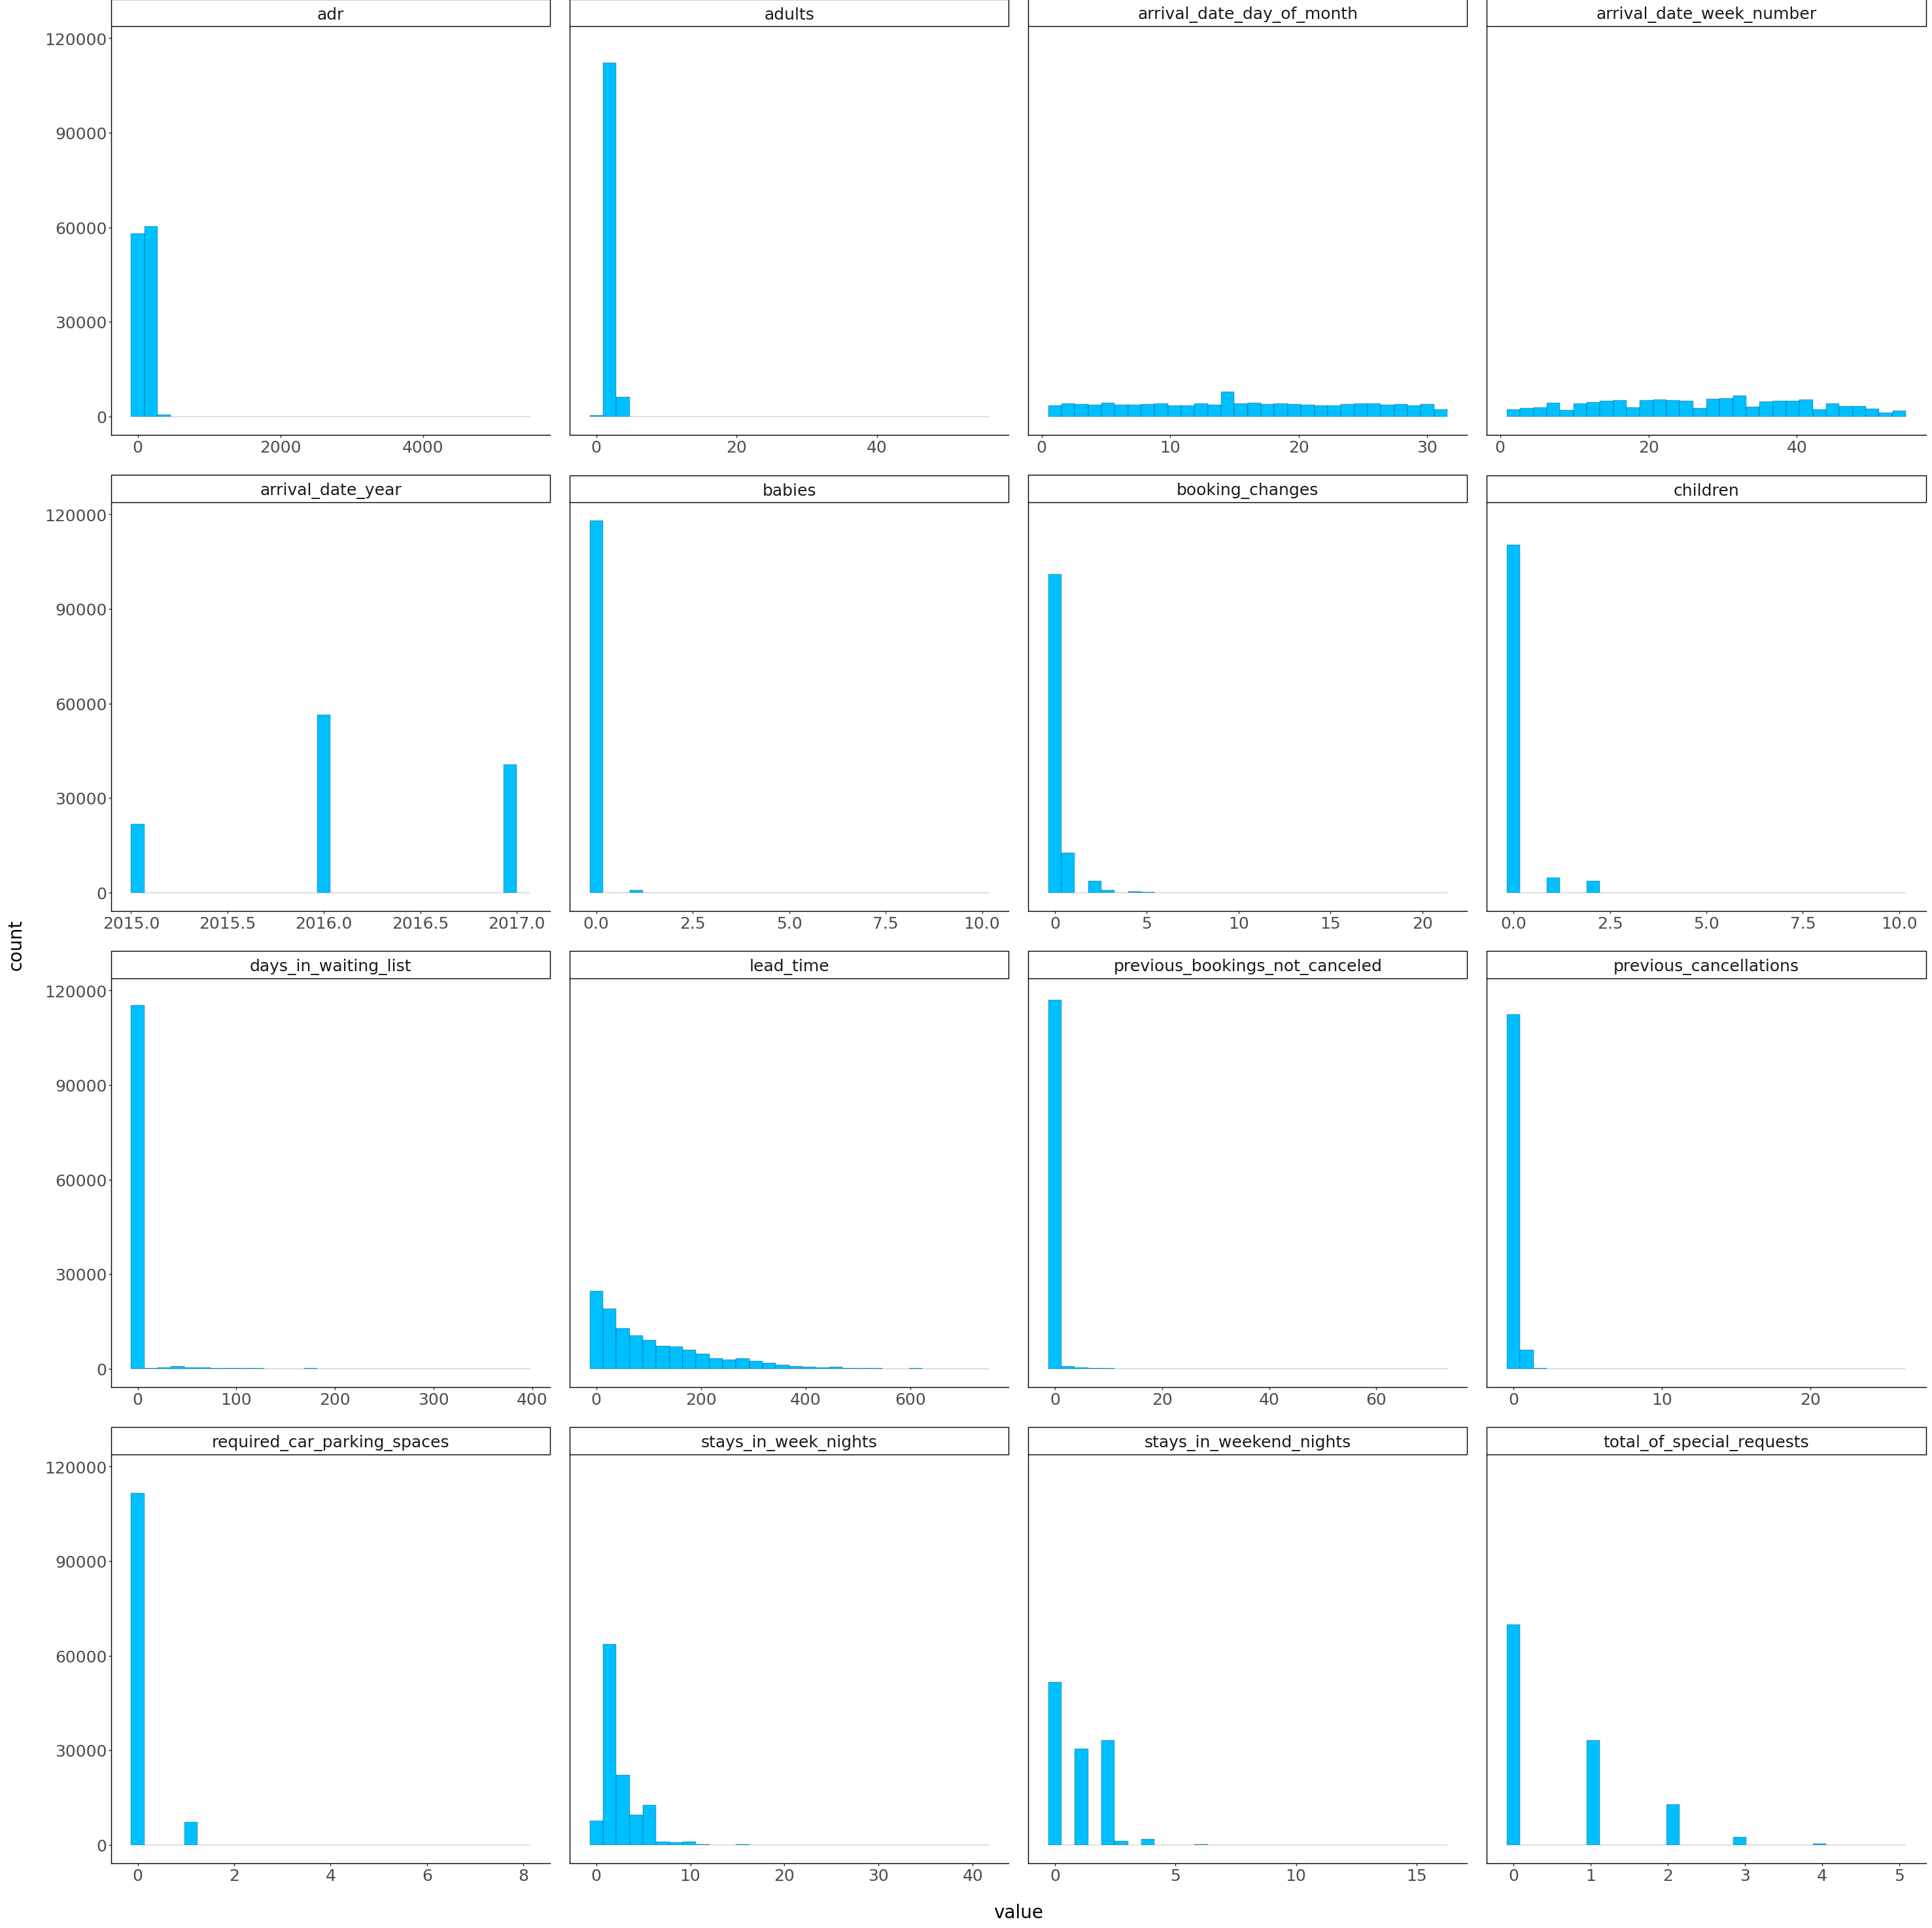

In [182]:
cont_plot.draw()

Bar Plots

In [109]:
from plotnine import (
    ggplot, aes, geom_bar, facet_wrap, theme_classic, theme, element_text, ggsave
)

# Melt categorical columns for visualization
abt_cat_melted = abt[cat_cols].melt(var_name='column', value_name='value')

# Design bar plots 
cat_plot = (
    ggplot(abt_cat_melted, aes(x='value')) +
    geom_bar(fill='deepskyblue', color='black', size=0.1) +  # Add thin line around bars
    facet_wrap('~column', nrow=12, ncol=3, scales='free_x') +
    theme_classic() +  # Apply classic theme
    theme(
        panel_spacing=0.005,  # Adjust space between panels
        figure_size=(10, 12),  # Increase the figure size (width, height)
        strip_text_x=element_text(size=8),  # Increase facet label size
        axis_text_x=element_text(size=9, angle=20),
        axis_text=element_text(size=8),  # Increase axis text size
        axis_title=element_text(size=11),  # Adjust axis title size
        # plot_title=element_text(size=36)  # Uncomment for plot title size
    )
)

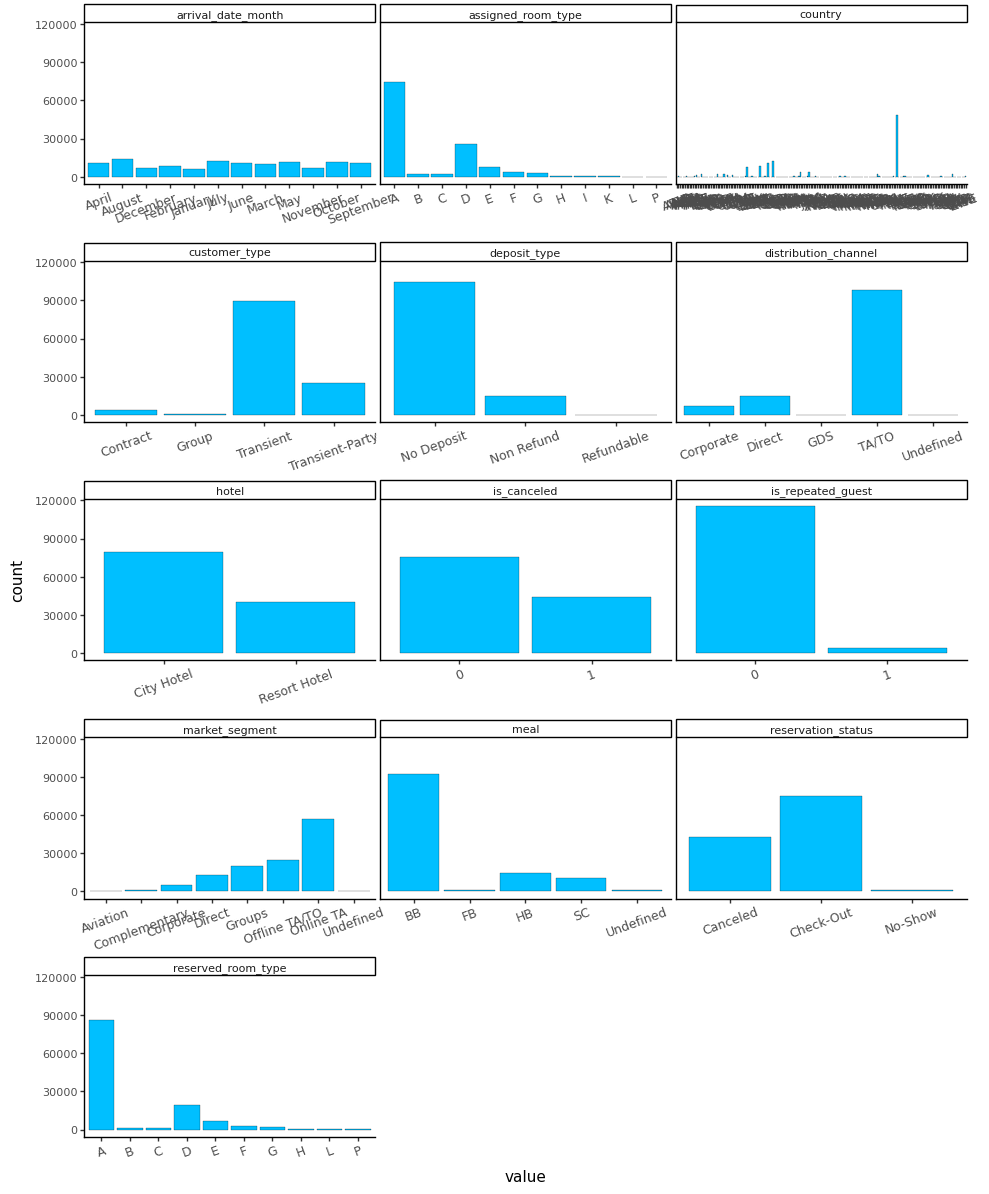

In [112]:
cat_plot.draw()

In [ ]:
# Cancellations are really high, about half of all reservations. Repeat guests are really low. Most guests stay only once.

#### 3B. Feature Relationships

Scatter Plot Matrix

In [204]:
## create a pairplot to visualize the relationships between multiple numeric columns
# This may take a while to render and will not show in the GitHub Preview. Uncomment to run this in JupyterLab.
sns.pairplot(abt[continuous_cols])

In [205]:
plt.savefig(r"scatterplot_matrix.png")

In [ ]:
# Uncomment to run the scatter in JupyterLab.
#plt.show()

In [ ]:
# There are no remarkable relationships between features.

In [127]:
# The scatterplot matrix has too many plots to read, so we will remove the features with low cardinality.
#continuous_high_card = []
#low_card = []

#for col in abt.columns:
    #if pd.api.types.is_numeric_dtype(abt[col]) and abt[col].nunique() > 5 :
        #continuous_high_card.append(col)
    #else:
        #low_card.append(col)

In [ ]:
#abt[continuous_high_card].head()

In [ ]:
#sns.pairplot(abt[continuous_high_card])

In [ ]:
#plt.show()

In [369]:
#import dash
#from dash import dcc
#from dash import html
#from dash.dependencies import Input, Output
#import plotly.express as px
#import seaborn as sns 
#import pandas as pd

#pd.DataFrame.iteritems = pd.DataFrame.items
# Load a sample dataset

# Create the scatterplot matrix
#fig_matrix = px.scatter_matrix(abt[continuous_high_card], dimensions=abt[continuous_high_card].columns[:-1])

#fig_matrix.update_layout(
#    autosize=False,
#    width=1000,
#    height=1000
#)

In [65]:
# This option is interactive. While the labels are had to read when there are too many plots, you can hover over the plots
# to see the values and labels. This tells you which features you are comparing, so you can easily identify the features with high
# correlation.

Correlation Matrix

In [54]:
correlation_matrix = abt[continuous_cols].corr()

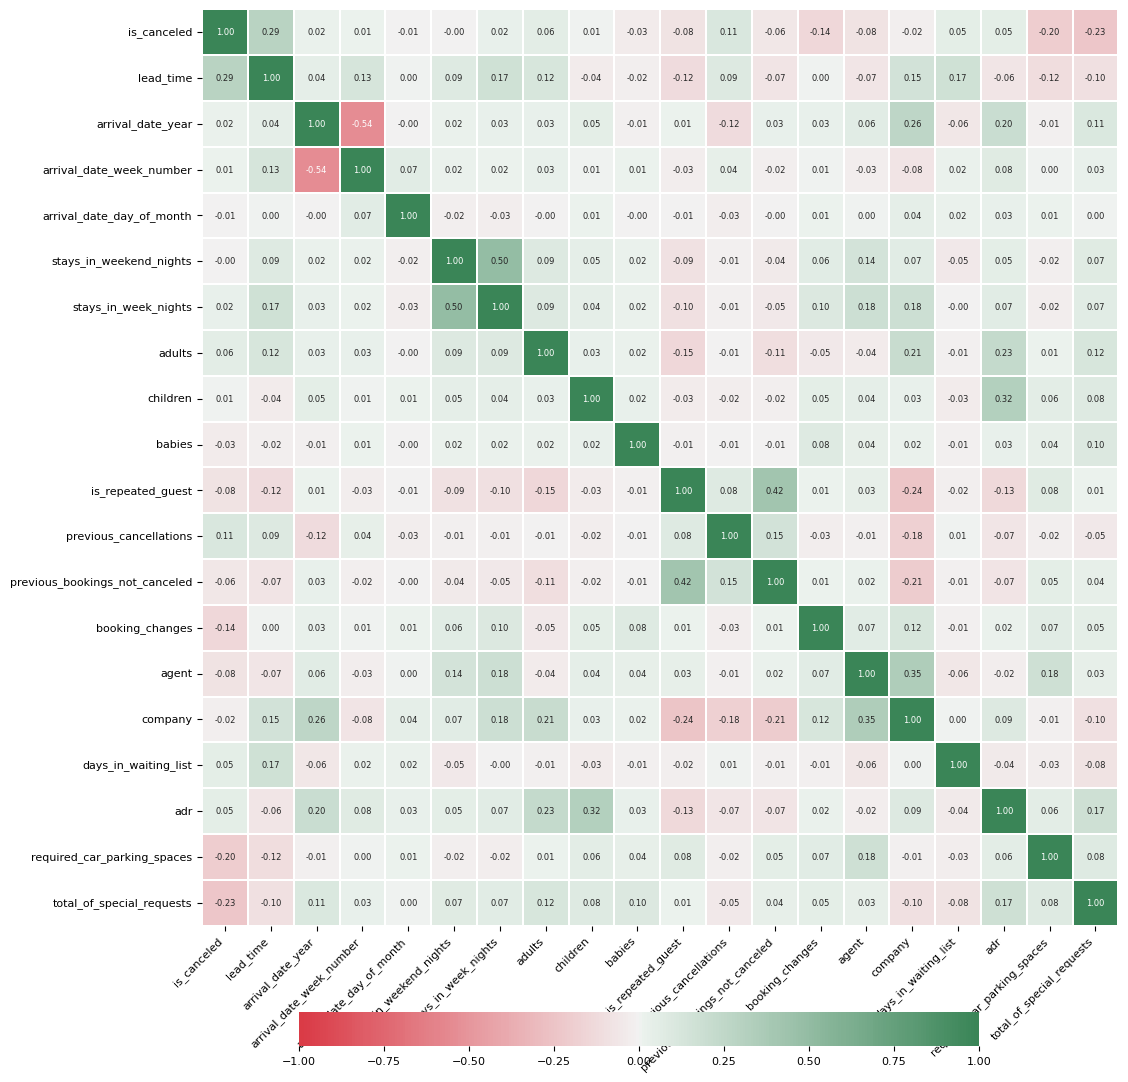

In [56]:
plt.figure(figsize=(17, 17))

axis_corr = sns.heatmap(
correlation_matrix,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(10, 500, n=500),
    square=True,
    annot=True,  # Show correlation coefficients in each square
    fmt=".2f", # Format the coefficients to 2 decimal places
    annot_kws={"size": 6},  # Set font size for correlation coefficients
    linewidths=.1,  # Add lines between squares for better visibility
    cbar_kws={"shrink": .60, "orientation": "horizontal"}  # Adjust color bar (legend) size
)

# Sets the font size and rotation for the x and y axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Adjust the position of the color legend
cbar = axis_corr.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_position([0.2, 0.27, 0.6, 0.02])

#for text in axis_corr.texts:
    #text.set_visible(True)

plt.show()

In [66]:
# Now we create a filtered correlation matrix that only shows features with moderate to strong correlations.
# This doesn't mean all correlations shown are strong, but that features with only weak correlations have been removed for readability.

filtered_corr_matrix = correlation_matrix.copy()
for col in correlation_matrix.columns:
    if ((correlation_matrix[col].abs() <= 0.4).all()) or ((correlation_matrix[col].abs() <= 0.4).sum() == len(correlation_matrix) - 1):
        filtered_corr_matrix.drop(col, axis=1, inplace=True)
        filtered_corr_matrix.drop(col, axis=0, inplace=True)

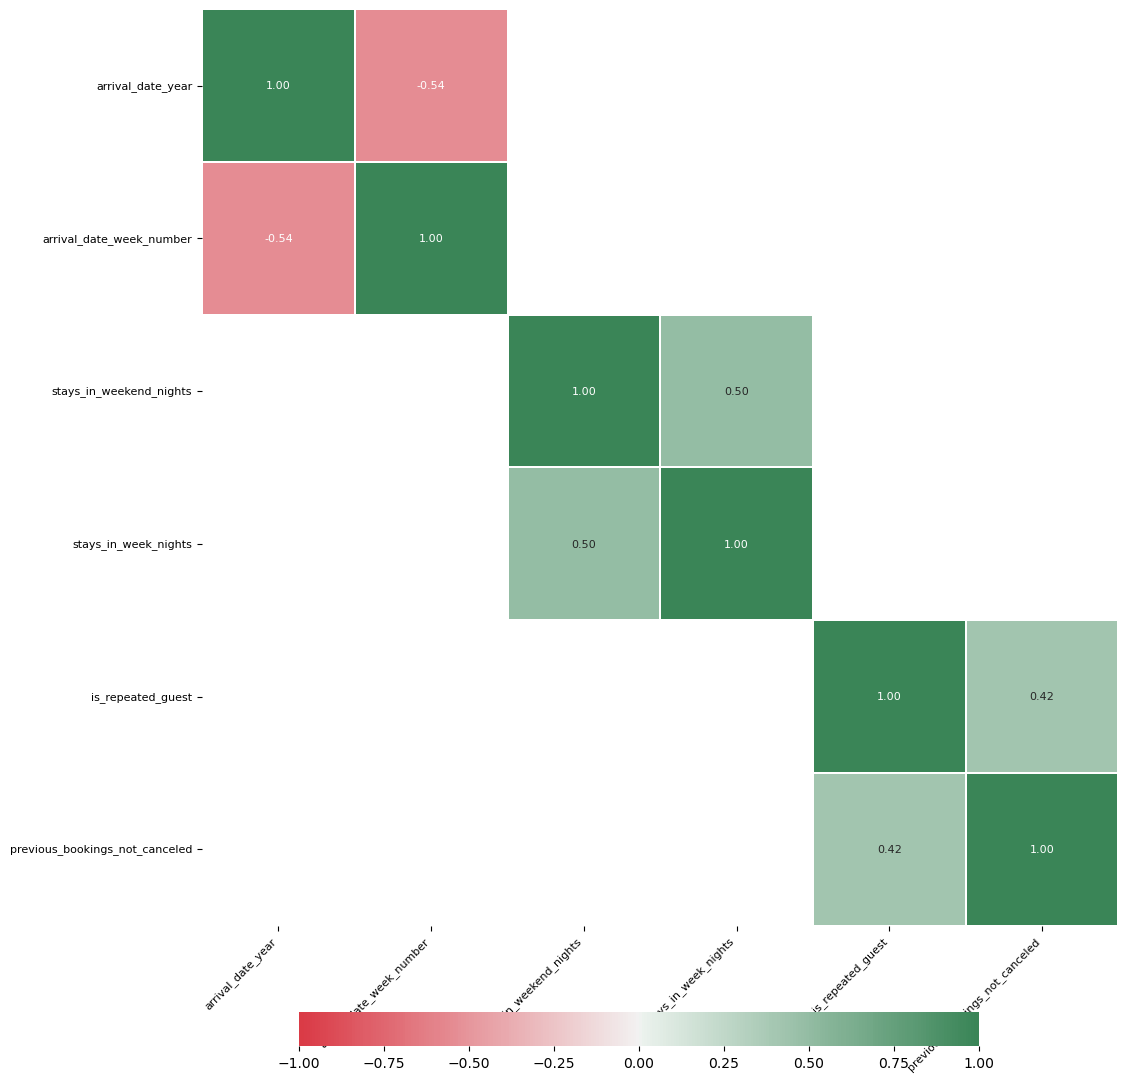

In [72]:
# visualizing correlations >.4

plt.figure(figsize=(17, 17))

axis_corr = sns.heatmap(
filtered_corr_matrix[filtered_corr_matrix.abs() > .4],
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(10, 500, n=500),
    square=True,
    annot=True,  # Show correlation coefficients in each square
    fmt=".2f", # Format the coefficients to 2 decimal places
    annot_kws={"size": 8},  # Set font size for correlation coefficients
    linewidths=.1, # Add lines between squares for better visibility
    cbar_kws={"shrink": .60, "orientation": "horizontal"}  # Adjust color bar (legend) size
)

# Sets the font size and rotation for the x and y axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Adjust the position of the color legend
cbar = axis_corr.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_position([0.2, 0.27, 0.6, 0.02])

#for text in axis_corr.texts:
    #text.set_visible(True)

plt.show()

In [138]:
# Weekend and weeknight stays are related. Arrival date and arrival year are correlated; we should not use both concurrently when modeling. 
# Previous bookings not cancelled is correlated with repeated guest. Otherwise, correlations are weak.

## Cramer's V Correlation Matrix

In [214]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return np.sqrt(stat/(obs*mini))

In [216]:
rows= []

for var1 in abt[cat_cols]:
  col = []
  for var2 in abt[cat_cols] :
    cramers =cramers_V(abt[var1], abt[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
matrix = pd.DataFrame(cramers_results, columns = abt[cat_cols].columns, index =abt[cat_cols].columns)


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,is_canceled,is_repeated_guest
hotel,1.00,0.07,0.32,0.30,0.14,0.18,0.32,0.39,0.18,0.05,0.13,0.13,0.05
arrival_date_month,0.07,1.00,0.09,0.09,0.09,0.07,0.05,0.03,0.10,0.10,0.06,0.07,0.08
meal,0.32,0.09,1.00,0.14,0.19,0.08,0.10,0.12,0.09,0.14,0.04,0.05,0.06
country,0.30,0.09,0.14,1.00,0.19,0.11,0.09,0.07,0.31,0.12,0.27,0.36,0.17
market_segment,0.14,0.09,0.19,0.19,1.00,0.69,0.13,0.12,0.37,0.28,0.19,0.27,0.35
distribution_channel,0.18,0.07,0.08,0.11,0.69,1.00,0.10,0.09,0.09,0.08,0.13,0.18,0.30
reserved_room_type,0.32,0.05,0.10,0.09,0.13,0.10,1.00,0.78,0.15,0.11,0.05,0.07,0.04
assigned_room_type,0.39,0.03,0.12,0.07,0.12,0.09,0.78,1.00,0.19,0.09,0.14,0.20,0.07
deposit_type,0.18,0.10,0.09,0.31,0.37,0.09,0.15,0.19,1.00,0.10,0.35,0.48,0.06
customer_type,0.05,0.10,0.14,0.12,0.28,0.08,0.11,0.09,0.10,1.00,0.10,0.14,0.11


In [228]:
plt.figure(figsize=(17, 17))

axis_corr = sns.heatmap(
matrix,
vmin=0, vmax=1, center=0.5,
cmap=sns.diverging_palette(30, 500, n=500),
    square=True,
    annot=True,  # Show correlation coefficients in each square
    fmt=".2f", # Format the coefficients to 2 decimal places
    annot_kws={"size": 6},  # Set font size for correlation coefficients
    linewidths=.1,  # Add lines between squares for better visibility
    cbar_kws={"shrink": .60, "orientation": "horizontal"}  # Adjust color bar (legend) size
)

# Sets the font size and rotation for the x and y axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Adjust the position of the color legend
cbar = axis_corr.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_position([0.2, 0.27, 0.6, 0.02])


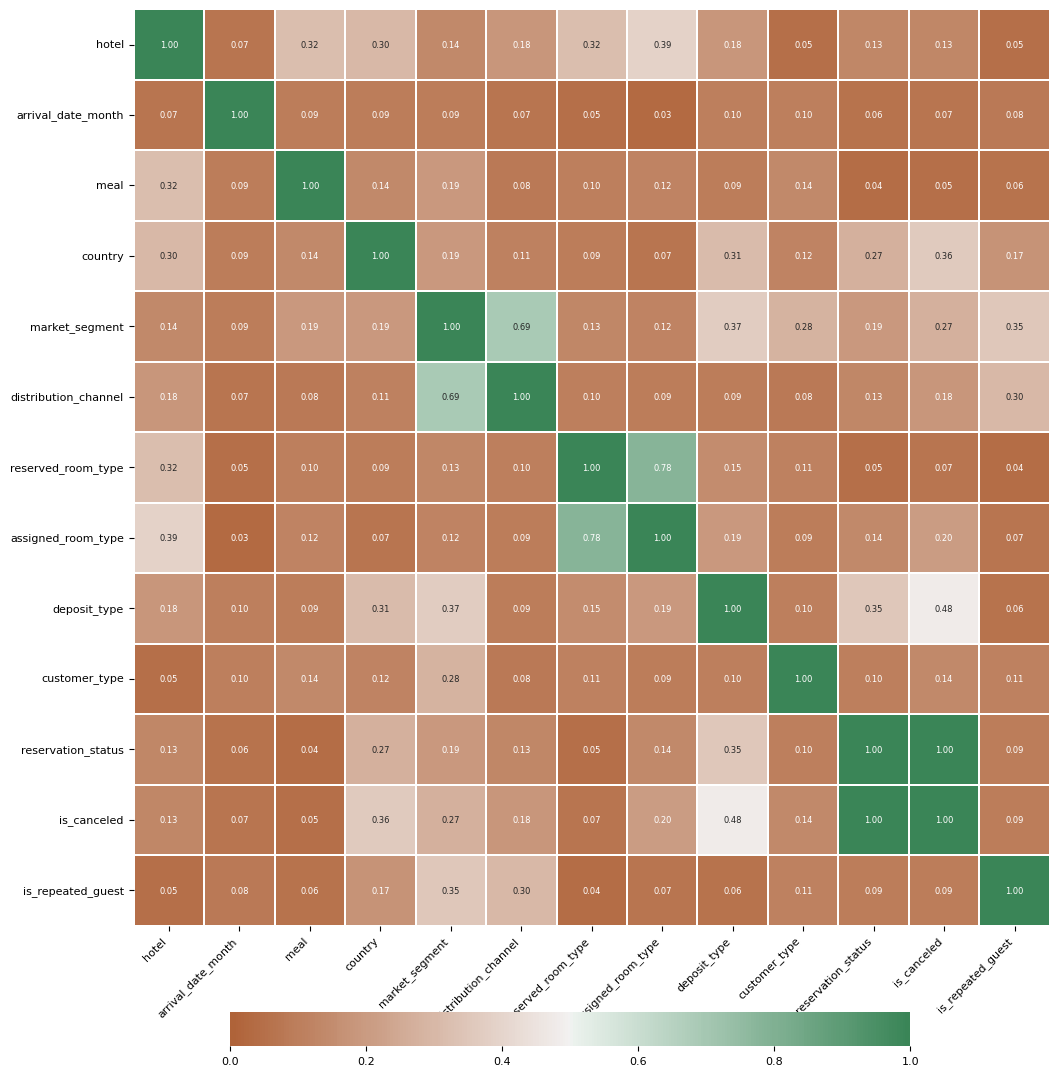

In [230]:
plt.show()

In [85]:
# There is a strong relationship between distribution channel and market segment.

Box Plots

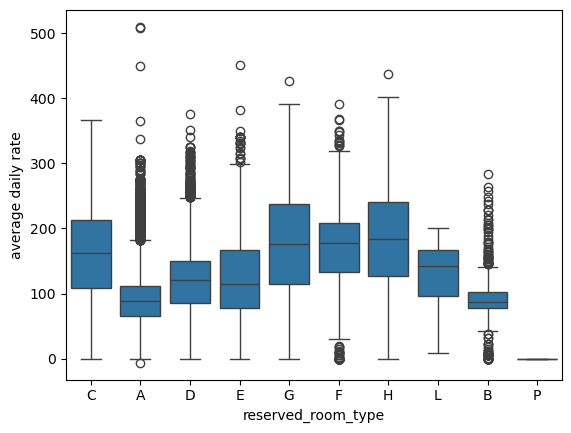

In [209]:
abt_trimmed = abt[abt['adr']<1000]
sns.boxplot(x='reserved_room_type', y='adr', data=abt_trimmed)
plt.ylabel('average daily rate')
plt.show()

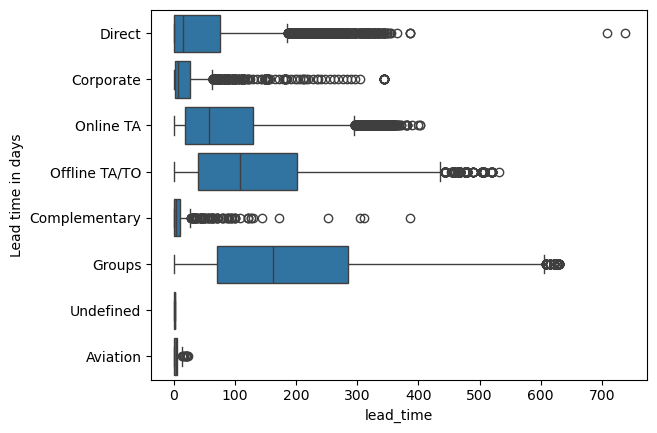

In [89]:
sns.boxplot(x='lead_time', y='market_segment', data=abt)
plt.ylabel('Lead time in days')
plt.show()

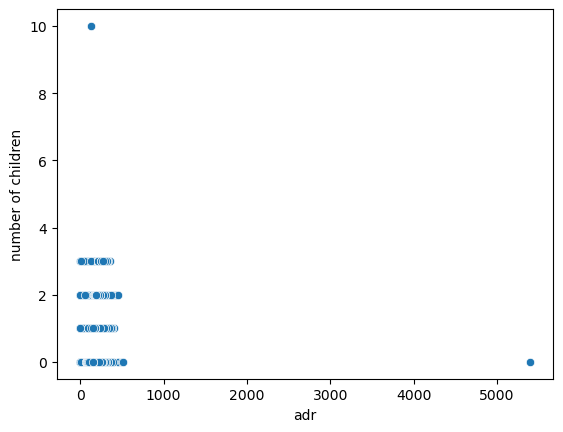

In [234]:
#Optional scatterplot
sns.scatterplot(x='adr', y='children', data=abt)
plt.ylabel('number of children')
plt.show()

In [120]:
abt[abt['children'] >8]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,Customer ID
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,10.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,0,Contract,133.16,0,1,No-Show,7/12/2015,Jamie Ramirez,Ramirez_Jamie22@aol.com,268-823-5667,************7600,C000329


In [335]:
cat_cols.remove('country')

In [337]:
abt_cat=abt[cat_cols].copy()

In [339]:
for col in cat_cols:
    abt_cat[col] = abt_cat[col].astype(str)

In [341]:
abt_cat.columns.tolist()

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'is_canceled',
 'is_repeated_guest']

In [343]:
# Melt categorical columns for visualization
abt_cat_melted = abt_cat.melt(id_vars=['is_canceled'], value_vars=cat_cols, var_name='column', value_name='value')

# Design bar plots 
cancellation_plot = (
    ggplot(abt_cat_melted, aes(x='value', fill='factor(is_canceled)')) +
    geom_bar(position='dodge', color='black', size=0.1) +  # Add thin line around bars
    facet_wrap('~column', nrow=4, ncol=3, scales='free_x') +
    theme_classic() +  # Apply classic theme
    theme(
        panel_spacing=0.005,  # Adjust space between panels
        figure_size=(10, 12),  # Increase the figure size (width, height)
        strip_text_x=element_text(size=8),  # Increase facet label size
        axis_text_x=element_text(size=9, angle=20),
        axis_text=element_text(size=8),  # Increase axis text size
        axis_title=element_text(size=11),  # Adjust axis title size
    )
)

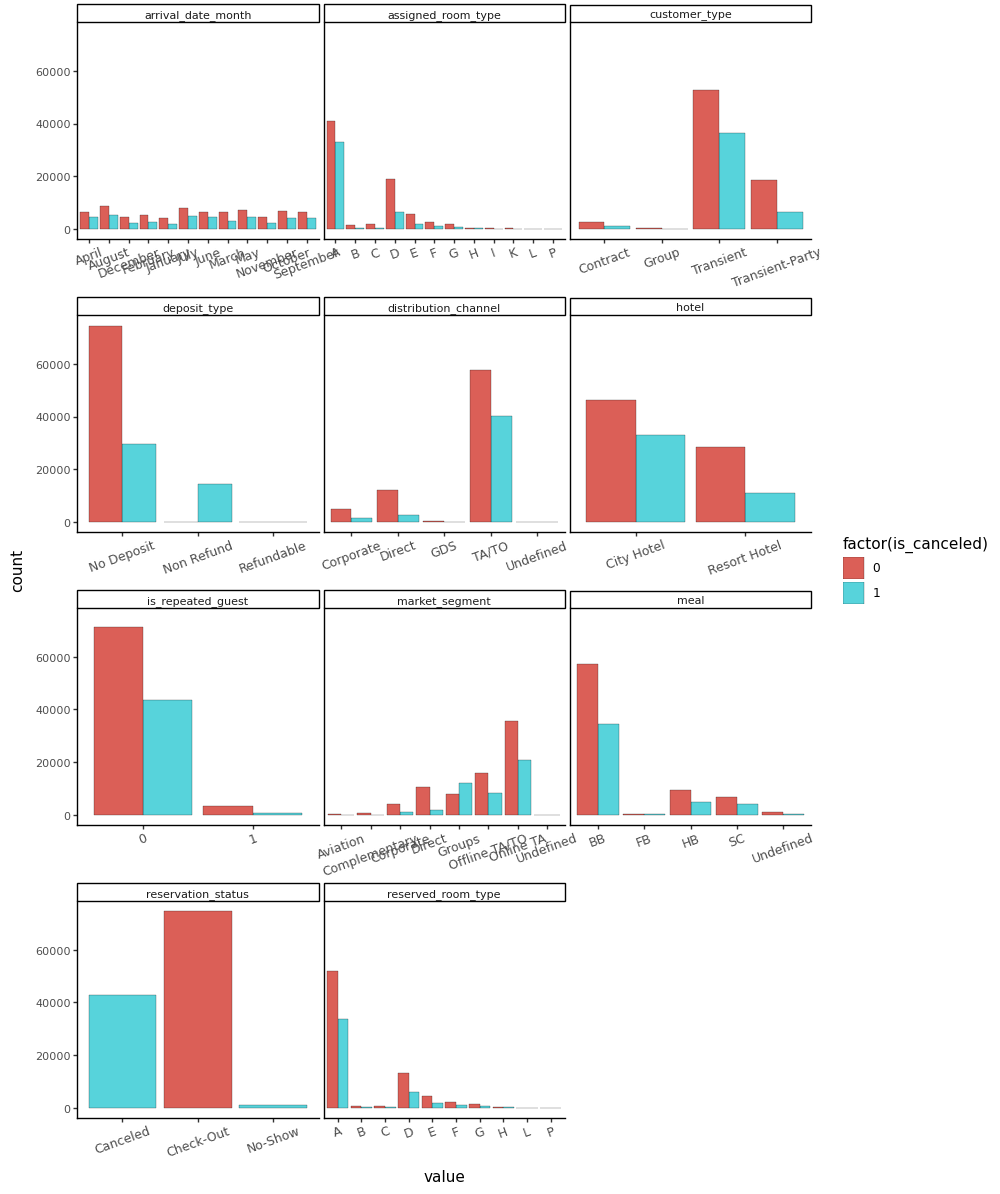

In [345]:
cancellation_plot.draw()

In [347]:
# Distribution channel and deposit type show interesting trends.

## Step 4: Data Preparation

### Outlier Plan

In [397]:
# Note: Many of our features are non-normal distributions, so we have to be careful using the IQR.

In [399]:
#Depending on the ML package, we may or may not need to encode certain features. We can leave this for the next iteration.

In [401]:
pd.set_option('display.max_colwidth', None)

In [403]:
outliers_df = pd.DataFrame(columns=['Feature', 'Outliers'])

for col in abt[continuous_cols].columns:
    outliers = []
    Q1 = abt[col].quantile(0.25)
    Q3 = abt[col].quantile(0.75)
    IQR = Q3 - Q1
    for value in abt[col].dropna():  # Ignore NaN values
        if (value < (Q1 - (1.5 * IQR))) or (value > (Q3 + (1.5 * IQR))):
            outliers.append(value)
    outliers_df = pd.concat([outliers_df, pd.DataFrame({'Feature': [col], 'Outliers': [sorted(outliers)]})], ignore_index=True)

In [404]:
outliers_df

,Feature,Outliers
0,lead_time,"[376, 376, 376, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 378, 378, 378, 378, 378, 378, 378, 378, ...]"
1,arrival_date_year,[]
2,arrival_date_week_number,[]
3,arrival_date_day_of_month,[]
4,stays_in_weekend_nights,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...]"
5,stays_in_week_nights,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...]"
6,adults,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
7,children,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...]"
8,babies,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...]"
9,previous_cancellations,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...]"


In [143]:
outliers_df = pd.DataFrame(columns=['Feature', 'Outliers'])

for col in abt[continuous_cols].columns:
    outliers = []
    Q1 = abt[col].quantile(0.25)
    Q3 = abt[col].quantile(0.75)
    IQR = Q3 - Q1
    for value in abt[col].dropna():  # Ignore NaN values
        if (value < (Q1 - (3 * IQR))) or (value > (Q3 + (3 * IQR))):
            outliers.append(value)
    outliers_df = pd.concat([outliers_df, pd.DataFrame({'Feature': [col], 'Outliers': [sorted(outliers)]})], ignore_index=True)

In [144]:
outliers_df

,Feature,Outliers
0,lead_time,"[594, 594, 594, 594, 594, 594, 594, 594, 594, 594, 594, 594, 594, 594, 594, 594, 594, 601, 601, 601, 601, 601, 601, 601, 601, 601, 601, 601, 601, 601, 601, 601, 601, 601, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 622, 622, ...]"
1,arrival_date_year,[]
2,arrival_date_week_number,[]
3,arrival_date_day_of_month,[]
4,stays_in_weekend_nights,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 13, 13, 13, 14, 14, 16, 16, 16]"
5,stays_in_week_nights,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, ...]"
6,adults,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
7,children,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...]"
8,babies,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...]"
9,previous_cancellations,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...]"


Outlier Plan:

Children -- 10 is outlier; drop


In [149]:
abt[abt['adults'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,Customer ID,status_change_leadtime,total_stay,gross_sales
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015,Colleen Hernandez,Colleen.H25@yandex.com,863-349-5397,************8042,C002225,0,3,0.00
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015,Mark Martinez,Martinez.Mark@yahoo.com,969-893-1222,************9670,C002410,0,0,0.00
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015,Carrie Carney,CarrieCarney@yandex.com,944-344-7905,************8964,C003182,3,3,0.00
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016,Summer Stewart,Stewart_Summer84@aol.com,125-574-6642,************1069,C003685,5,5,0.00
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016,Brian Buchanan,Brian.B@yahoo.com,946-176-5726,************9836,C003709,6,6,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,0,296,2017,July,30,27,1,3,0,2.0,0,BB,GBR,Online TA,TA/TO,0,0,0,B,A,0,No Deposit,0,Transient,98.85,0,1,Check-Out,7/31/2017,Stephanie Bradley,Stephanie.B@outlook.com,439-784-5946,************1335,C117205,4,4,395.40
117274,City Hotel,0,276,2017,July,31,30,2,1,0,2.0,0,BB,DEU,Online TA,TA/TO,0,0,0,B,B,1,No Deposit,0,Transient,93.64,0,2,Check-Out,8/2/2017,Paige Stevens,Paige_Stevens@hotmail.com,980-920-0342,************8864,C117275,3,3,280.92
117303,City Hotel,0,291,2017,July,30,29,2,2,0,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,B,A,0,No Deposit,0,Transient,98.85,0,1,Check-Out,8/2/2017,Daniel Guerra,DanielGuerra@verizon.com,287-276-3979,************6983,C117304,4,4,395.40
117453,City Hotel,0,159,2017,July,31,31,1,3,0,2.0,0,SC,FRA,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient,121.88,0,1,Check-Out,8/4/2017,Connie Nichols,Connie.Nichols@gmail.com,157-090-2197,************6378,C117454,4,4,487.52


In [151]:
len(abt[abt['adults'] == 0])

393

We can impute for rows with 0 adults, using the mode.

In [154]:
abt[(abt['stays_in_weekend_nights']>2) & (abt['stays_in_week_nights']<5)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,Customer ID,status_change_leadtime,total_stay,gross_sales


There are a number of customers staying more than a week. These are not mistakes in the data.

In [157]:
abt[abt['stays_in_weekend_nights']>2].head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,Customer ID,status_change_leadtime,total_stay,gross_sales
31,Resort Hotel,0,95,2015,July,27,1,4,11,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,63.86,0,0,Check-Out,7/16/2015,Paul Williams,Williams_Paul@xfinity.com,789-736-8837,************7006,C000032,15,15,957.90
51,Resort Hotel,0,93,2015,July,27,2,3,8,2,0.0,0,BB,IRL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Contract,56.01,0,0,Check-Out,7/13/2015,Elizabeth Joseph,Joseph_Elizabeth@yandex.com,625-613-9890,************5898,C000052,11,11,616.11
52,Resort Hotel,0,76,2015,July,27,2,4,10,2,0.0,0,BB,OMN,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Contract,110.70,0,0,Check-Out,7/16/2015,Stephen Brown,Stephen.Brown@att.com,154-115-9953,************6842,C000053,14,14,1549.80
81,Resort Hotel,1,368,2015,July,27,3,3,7,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Contract,55.68,0,0,Canceled,5/19/2015,Clayton Cowan,Clayton.Cowan31@protonmail.com,504-743-2620,************8621,C000082,-45,10,556.80
82,Resort Hotel,0,364,2015,July,27,3,3,7,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Contract,55.68,0,0,Check-Out,7/13/2015,Mrs. Debra Jackson DDS,DDS_Mrs.@att.com,307-631-6954,************5361,C000083,10,10,556.80
83,Resort Hotel,1,81,2015,July,27,3,3,7,2,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,2,No Deposit,0,Transient,124.00,0,1,Canceled,6/9/2015,Raymond Young,Young.Raymond92@verizon.com,699-642-7831,************1207,C000084,-24,10,1240.00
84,Resort Hotel,0,99,2015,July,27,3,3,7,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,E,E,0,No Deposit,0,Contract,111.15,0,0,Check-Out,7/13/2015,Lisa Schroeder,Schroeder.Lisa@comcast.net,530-765-2207,************6525,C000085,10,10,1111.50
85,Resort Hotel,0,324,2015,July,27,3,4,10,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,E,E,0,No Deposit,0,Contract,134.73,0,0,Check-Out,7/17/2015,Kristin Roberts,Kristin_Roberts56@protonmail.com,697-234-2961,************5111,C000086,14,14,1886.22
86,Resort Hotel,0,69,2015,July,27,3,4,10,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,F,F,1,No Deposit,0,Transient,92.45,0,1,Check-Out,7/17/2015,Howard Williams,Howard_W@outlook.com,725-661-7321,************7698,C000087,14,14,1294.30
87,Resort Hotel,1,79,2015,July,27,3,6,15,2,1.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,108.73,0,2,Canceled,4/15/2015,Jennifer Murphy,Murphy.Jennifer59@yandex.com,704-540-0581,************5298,C000088,-79,21,2283.33


In [159]:
abt[abt['stays_in_weekend_nights']>5]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,Customer ID,status_change_leadtime,total_stay,gross_sales
87,Resort Hotel,1,79,2015,July,27,3,6,15,2,1.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,108.73,0,2,Canceled,4/15/2015,Jennifer Murphy,Murphy.Jennifer59@yandex.com,704-540-0581,************5298,C000088,-79,21,2283.33
1149,Resort Hotel,1,47,2015,August,33,15,6,12,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,181.94,0,0,Canceled,7/6/2015,Jonathan Johnson,JonathanJohnson95@comcast.net,686-173-5784,************2584,C001150,-40,18,3274.92
1655,Resort Hotel,0,30,2015,September,37,7,13,33,2,0.0,0,SC,ESP,Online TA,TA/TO,0,0,0,A,I,17,No Deposit,0,Transient,0.00,0,1,Check-Out,10/23/2015,Jonathan Monroe,Jonathan_M@xfinity.com,917-729-7290,************8261,C001656,46,46,0.00
1754,Resort Hotel,0,170,2015,September,37,12,6,12,2,0.0,0,HB,SWE,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Contract,72.25,0,0,Check-Out,9/30/2015,Tara Davis,TDavis@protonmail.com,113-174-6687,************2199,C001755,18,18,1300.50
1790,Resort Hotel,0,135,2015,September,38,14,8,20,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Contract,82.00,0,0,Check-Out,10/12/2015,Debra Caldwell,DebraCaldwell@aol.com,546-930-7136,************1693,C001791,28,28,2296.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103282,City Hotel,0,3,2016,November,47,14,9,25,2,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,3,No Deposit,0,Transient,93.00,0,0,Check-Out,12/18/2016,Emily Jackson,Jackson_Emily57@att.com,638-916-0312,************5357,C103283,34,34,3162.00
105050,City Hotel,0,82,2017,January,1,7,6,16,2,0.0,0,SC,BRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,74.80,0,4,Check-Out,1/29/2017,Robert Lam,Lam_Robert@xfinity.com,645-086-9379,************5474,C105051,22,22,1645.60
106335,City Hotel,0,30,2017,February,5,2,6,16,2,0.0,0,BB,CN,Online TA,TA/TO,0,0,0,E,E,1,No Deposit,0,Transient,115.60,0,3,Check-Out,2/24/2017,Jennifer Chan,Jennifer_C@mail.com,588-717-3220,************8928,C106336,22,22,2543.20
106561,City Hotel,0,11,2017,January,3,15,13,30,0,0.0,0,SC,USA,Online TA,TA/TO,0,0,0,A,K,14,No Deposit,0,Transient,0.00,0,0,Check-Out,2/27/2017,Lisa Hensley,Lisa.H@xfinity.com,901-685-4288,************2453,C106562,43,43,0.00


### Imputation and Calculations

In [377]:
# Option to impute
# abt[abt['Column'].isnull()]
# prepped_abt['Column'].fillna(0, inplace=True)

In [379]:
# Function to convert month name to month number
def month_name_to_number(month_name):
    datetime_object = datetime.strptime(month_name, "%B")
    return datetime_object.month

In [381]:
from datetime import datetime

# Calculate the difference between two dates
def calculate_date_difference(row):
    arrival_date = datetime(year=row['arrival_date_year'], 
                            month=month_name_to_number(row['arrival_date_month']), 
                            day=row['arrival_date_day_of_month'])
    
    reservation_status_date = datetime.strptime(row['reservation_status_date'], "%m/%d/%Y")
    
    return (reservation_status_date - arrival_date).days

# Apply the function to each row and create a new column with the differences
abt['status_change_leadtime'] = abt.apply(calculate_date_difference, axis=1)

In [382]:
abt[abt['reservation_status']=='Canceled'].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,Customer ID,status_change_leadtime
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,5/6/2015,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,C000009,-56
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,4/22/2015,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,C000010,-70
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,6/23/2015,Priscilla Collins PhD,PhD.Priscilla74@att.com,833-887-7898,************4642,C000011,-8
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,5/11/2015,Jaime Flynn,JaimeFlynn29@gmail.com,549-866-3721,************9660,C000028,-51
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,5/29/2015,Reginald Cunningham,Reginald_C57@outlook.com,800-249-2144,************5699,C000033,-33


In [383]:
abt['total_stay'] = abt['stays_in_weekend_nights'] + abt['stays_in_week_nights']

In [384]:
abt['gross_sales'] = abt['adr'] * abt['total_stay']

In [385]:
len(abt[abt['total_stay']==0])

701

In [386]:
len(abt[abt['adr']==0])

1938

In [387]:
len(abt[(abt['total_stay']==0) & (abt['adr'] == 0)])

701

We will drop all rows where the total stay is 0 days and the average daily rate is 0 days. These rows are not helpful to our analysis.

In [442]:
# Now let's make a copy of our ABT.
prepped_abt = abt.copy()

In [430]:
abt['adults'].mode()

0    2
Name: adults, dtype: int64

In [446]:
# imputing 2 for rows with 0 adults
prepped_abt['adults'] = np.where(prepped_abt['adults'] == 0, 2, prepped_abt['adults'])

In [448]:
prepped_abt['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55, 20,  6,  5, 10], dtype=int64)

In [454]:
prepped_abt[(prepped_abt['adults'] >10) & (prepped_abt['adr']>0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,Customer ID,status_change_leadtime,total_stay,gross_sales


There are suspiciously high numbers of adults, however, these rows will be dropped later because they do not have a daily rate.

<br>

### Dropping Rows

In [459]:
# Dropping outliers for specific values, e.g., when children is 10 -- an outlier
to_drop = [10]
prepped_abt = prepped_abt[~prepped_abt['children'].isin(to_drop)]

In [461]:
# Dropping any cases where there are 0 days in the stay or the daily rate is 0
prepped_abt = abt[(abt['total_stay'] != 0) & (abt['adr'] != 0)]

In [463]:
# Dropping any cases where number of children is null
prepped_abt = prepped_abt[prepped_abt['children'].isnull()==False]

In [465]:
# Placeholder; update before running

#gla_Q1 = abt['Column'].quantile(0.25)
#gla_Q3 = abt['Column'].quantile(0.75)
#gla_IQR = gla_Q3 - gla_Q1

#prepped_abt = prepped_abt[(prepped_abt['Column'] >= (gla_Q1 - 1.5 * gla_IQR)) & 
    #(prepped_abt['Column'] <= (gla_Q3 + 1.5 * gla_IQR))]

In [467]:
prepped_abt.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,Customer ID,status_change_leadtime,total_stay,gross_sales
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,C000003,1,1,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,C000004,1,1,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498,C000005,2,2,196.0
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263,C000006,2,2,196.0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,7/3/2015,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994,C000007,2,2,214.0


In [469]:
# Redefine continuous columns now that features have been dropped.
prepped_categorical_cols = []
prepped_continuous_cols = []

for col in prepped_abt.columns:
    if pd.api.types.is_numeric_dtype(prepped_abt[col]):
        prepped_continuous_cols.append(col)
    else:
        prepped_categorical_cols.append(col)


### Transformations

In [472]:
# Depending on the ML algorithms used, some features may need to be transformed.
# Transformations will be included in the next iteration. 
# Possible transformations:
# Normalization 
# Standardizations
# Clamp Transformation

### Encoding

In [475]:
# Encoding company so that 1 indicates a company is on file; 0 indicates no company on file
prepped_abt['company'] = np.where(prepped_abt['company'].isnull(), 0, 1)

In [477]:
# Encoding agent so that 1 indicates a company is on file; 0 indicates no company on file
prepped_abt['agent'] = np.where(prepped_abt['agent'].isnull(), 0, 1)

In [479]:
month_dict = prepped_abt['arrival_date_month'].value_counts().to_dict()

In [481]:
month_dict

{'August': 13686,
 'July': 12459,
 'May': 11599,
 'April': 10914,
 'October': 10864,
 'June': 10807,
 'September': 10310,
 'March': 9590,
 'February': 7868,
 'November': 6602,
 'December': 6514,
 'January': 5747}

In [483]:
# Encode season using month. Portugal's season's are similar to North America.

# Initialize the 'season' column
prepped_abt['season'] = ''

# Encode season using month
for index, row in prepped_abt.iterrows():
    if row['arrival_date_month'] in ['June', 'July', 'August']:
        prepped_abt.at[index, 'season'] = 'summer'
    elif row['arrival_date_month'] in ['September', 'October', 'November']:
        prepped_abt.at[index, 'season'] = 'fall'
    elif row['arrival_date_month'] in ['December', 'January', 'February']:
        prepped_abt.at[index, 'season'] = 'winter'
    else:
        prepped_abt.at[index, 'season'] = 'spring'

In [484]:
season_dict = prepped_abt['season'].value_counts().to_dict()

In [485]:
season_dict

{'summer': 36952, 'spring': 32103, 'fall': 27776, 'winter': 20129}

In [486]:
# Make a copy of the abt so that the abt is preserved and the encoded version is separate
abt_encoded = prepped_abt.copy()

In [487]:
# One-Hot Encoding for nominal columns
columns_for_1_hot = ['hotel', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type', 'season', 'reservation_status', 'meal', 'deposit_type']
abt_encoded = pd.get_dummies(abt_encoded, columns=columns_for_1_hot)

In [488]:
abt_encoded.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,email,phone-number,credit_card,Customer ID,status_change_leadtime,total_stay,gross_sales,hotel_City Hotel,hotel_Resort Hotel,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,season_fall,season_spring,season_summer,season_winter,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
2,0,7,2015,July,27,1,0,1,1,0.0,0,GBR,0,0,0,0,0,0,0,75.0,0,0,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,C000003,1,1,75.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
3,0,13,2015,July,27,1,0,1,1,0.0,0,GBR,0,0,0,0,1,0,0,75.0,0,0,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,C000004,1,1,75.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
4,0,14,2015,July,27,1,0,2,2,0.0,0,GBR,0,0,0,0,1,0,0,98.0,0,1,7/3/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498,C000005,2,2,196.0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
5,0,14,2015,July,27,1,0,2,2,0.0,0,GBR,0,0,0,0,1,0,0,98.0,0,1,7/3/2015,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263,C000006,2,2,196.0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
6,0,0,2015,July,27,1,0,2,2,0.0,0,PRT,0,0,0,0,0,0,0,107.0,0,0,7/3/2015,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994,C000007,2,2,214.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0


In [489]:
prepped_abt['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [497]:
prepped_abt[prepped_abt['reservation_status']=='No-Show']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,Customer ID,status_change_leadtime,total_stay,gross_sales,season
122,Resort Hotel,1,36,2015,July,27,4,0,1,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,G,1,No Deposit,1,0,0,Transient,123.00,0,0,No-Show,7/4/2015,Linda Anderson,LindaAnderson@att.com,161-412-7478,************7036,C000123,0,1,123.00,summer
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,10.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,1,0,0,Contract,133.16,0,1,No-Show,7/12/2015,Jamie Ramirez,Ramirez_Jamie22@aol.com,268-823-5667,************7600,C000329,0,14,1864.24,summer
343,Resort Hotel,1,47,2015,July,29,12,2,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,1,0,0,Transient,103.80,0,0,No-Show,7/12/2015,Brianna Sullivan,Brianna.S86@xfinity.com,851-650-1614,************4355,C000344,0,5,519.00,summer
467,Resort Hotel,1,6,2015,July,29,17,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,C,0,No Deposit,1,0,0,Transient,110.50,0,1,No-Show,7/17/2015,Troy Morales,Troy_M@zoho.com,376-268-7634,************1174,C000468,0,2,221.00,summer
472,Resort Hotel,1,3,2015,July,29,17,0,2,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,1,0,0,Transient,107.60,0,0,No-Show,7/17/2015,Tiffany George,Tiffany_George@att.com,242-036-1745,************4121,C000473,0,2,215.20,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97968,City Hotel,1,0,2016,October,42,10,1,2,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,D,0,No Deposit,0,1,0,Transient,153.00,0,0,No-Show,10/10/2016,Jason Rice,Jason_R@aol.com,759-264-1563,************2919,C097969,0,3,459.00,fall
108459,City Hotel,1,31,2017,July,29,16,2,0,1,0.0,0,BB,USA,Direct,Direct,1,0,2,A,A,1,No Deposit,0,0,0,Transient,135.00,0,2,No-Show,7/16/2017,Lisa Martinez,LMartinez40@zoho.com,657-838-5362,************1145,C108460,0,2,270.00,summer
108829,City Hotel,1,25,2017,May,18,6,2,1,1,0.0,0,BB,FRA,Corporate,Corporate,1,0,1,E,F,0,No Deposit,0,1,0,Transient,125.00,0,0,No-Show,5/6/2017,James Bradley,James.Bradley@outlook.com,157-768-4384,************1228,C108830,0,3,375.00,spring
111925,City Hotel,1,6,2017,July,29,17,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,1,1,A,D,0,No Deposit,0,1,0,Transient,65.00,0,0,No-Show,7/17/2017,Lisa Berg,Lisa_Berg@yandex.com,348-997-3814,************6388,C111926,0,1,65.00,summer


In [499]:
abt_encoded.drop(['name', 'email', 'phone-number', 'credit_card','reservation_status_date','arrival_date_year', 'arrival_date_month','arrival_date_day_of_month', 'country'], axis = 1, inplace=True)

In [501]:
abt_encoded.head()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Customer ID,status_change_leadtime,total_stay,gross_sales,hotel_City Hotel,hotel_Resort Hotel,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,season_fall,season_spring,season_summer,season_winter,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
2,0,7,27,0,1,1,0.0,0,0,0,0,0,0,0,0,75.0,0,0,C000003,1,1,75.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
3,0,13,27,0,1,1,0.0,0,0,0,0,0,1,0,0,75.0,0,0,C000004,1,1,75.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
4,0,14,27,0,2,2,0.0,0,0,0,0,0,1,0,0,98.0,0,1,C000005,2,2,196.0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
5,0,14,27,0,2,2,0.0,0,0,0,0,0,1,0,0,98.0,0,1,C000006,2,2,196.0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
6,0,0,27,0,2,2,0.0,0,0,0,0,0,0,0,0,107.0,0,0,C000007,2,2,214.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0


In [503]:
# At this stage, we leave the customer ID so that the data can be aggregated by customer

In [536]:
transactions_df = abt_encoded.drop(['Customer ID'], axis = 1, inplace = False)

In [538]:
transactions_df.to_csv('hotel_transactions_encoded', index=False)

#### Customer-based Data (Aggregated)

In [506]:
#abt_encoded['total_stay'] = abt_encoded['stays_in_weekend_nights'] + abt_encoded['stays_in_week_nights']
#abt_encoded[abt_encoded['total_stay']==0] = 1

In [526]:
# Define aggregation functions
aggregation_functions = {
    'is_canceled': 'mean',
    'lead_time': 'mean',
    'stays_in_weekend_nights': ['mean', 'sum'],
    'stays_in_week_nights': ['mean', 'sum'],
    'adults': 'mean',
    'children': 'mean',
    'babies': 'mean',
    'is_repeated_guest': lambda x: x.any(),
    'previous_cancellations': 'sum',
    'previous_bookings_not_canceled': 'sum',
    'booking_changes': 'mean',
    'days_in_waiting_list': 'mean',
    'adr': lambda x: (x * (abt_encoded.loc[x.index, 'total_stay'])).sum() / (abt_encoded.loc[x.index, 'total_stay']).sum(),
    'required_car_parking_spaces': 'mean',
    'total_of_special_requests': 'sum',
    'total_stay': 'sum',
    'total_stay': 'count',
    'gross_sales': 'sum'
}

# Aggregate the data frame by Customer ID using the defined aggregation functions
aggregated_abt = abt_encoded.groupby('Customer ID').agg(aggregation_functions)

# Rename columns
column_renames = {
    "is_canceled_mean": "percentage_cancelled",
    "lead_time_mean": "avg_lead_time",
    "stays_in_weekend_nights_mean": "avg_stays_in_weekend_nights",
    "stays_in_weekend_nights_sum": "total_stays_in_weekend_nights",
    "stays_in_week_nights_mean": "avg_stays_in_week_nights",
    "stays_in_week_nights_sum": "total_stays_in_week_nights",
    "adults_mean": "avg_adults",
    "children_mean": "avg_children",
    "babies_mean": "avg_babies",
    "is_repeated_guest_<lambda>": "is_repeated_guest",
    "previous_cancellations_sum": "previous_cancellations",
    "previous_bookings_not_canceled_sum": "previous_bookings_not_canceled",
    "booking_changes_mean": "avg_booking_changes",
    "days_in_waiting_list_mean": "avg_days_in_waiting_list",
    "adr_<lambda>": "avg_daily_rate",
    "required_car_parking_spaces_mean": "avg_car_parking_spaces",
    "total_of_special_requests_sum": "total_of_special_requests",
    "total_stay_sum": "total_stay",
    "total_stay_count": "no_of_bookings",
    "gross_sales_sum": "total_gross_sales"
    
}


# Flatten multi-level column names if any and rename columns
aggregated_abt.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in aggregated_abt.columns]
aggregated_abt.rename(columns=column_renames, inplace=True)


In [528]:
aggregated_abt.head(20)

,percentage_cancelled,avg_lead_time,avg_stays_in_weekend_nights,total_stays_in_weekend_nights,avg_stays_in_week_nights,total_stays_in_week_nights,avg_adults,avg_children,avg_babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_booking_changes,avg_days_in_waiting_list,avg_daily_rate,avg_car_parking_spaces,total_of_special_requests,no_of_bookings,total_gross_sales
Customer ID,,,,,,,,,,,,,,,,,,,
C000003,0.0,7.0,0.0,0,1.0,1,1.0,0.0,0.0,False,0,0,0.0,0.0,75.00,0.0,0,1,75.00
C000004,0.0,13.0,0.0,0,1.0,1,1.0,0.0,0.0,False,0,0,0.0,0.0,75.00,0.0,0,1,75.00
C000005,0.0,14.0,0.0,0,2.0,2,2.0,0.0,0.0,False,0,0,0.0,0.0,98.00,0.0,1,1,196.00
C000006,0.0,14.0,0.0,0,2.0,2,2.0,0.0,0.0,False,0,0,0.0,0.0,98.00,0.0,1,1,196.00
C000007,0.0,0.0,0.0,0,2.0,2,2.0,0.0,0.0,False,0,0,0.0,0.0,107.00,0.0,0,1,214.00
C000008,0.0,9.0,0.0,0,2.0,2,2.0,0.0,0.0,False,0,0,0.0,0.0,103.00,0.0,1,1,206.00
C000009,1.0,85.0,0.0,0,3.0,3,2.0,0.0,0.0,False,0,0,0.0,0.0,82.00,0.0,1,1,246.00
C000010,1.0,75.0,0.0,0,3.0,3,2.0,0.0,0.0,False,0,0,0.0,0.0,105.50,0.0,0,1,316.50
C000011,1.0,23.0,0.0,0,4.0,4,2.0,0.0,0.0,False,0,0,0.0,0.0,123.00,0.0,0,1,492.00


In [530]:
aggregated_abt.to_csv('hotel_customer_data', index=False)

In [511]:
len(aggregated_abt)

116472